In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [17]:
# path to numpy .npz file that stores MFCCs and genre labels for each processed segment
DATA_PATH = "../classifier/data_10.npz"

In [15]:
def load_data(data_path):
    """Loads training dataset from npz file.

        :param data_path (str): Path to npz file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    data = np.load(data_path)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")
    print("Shape of X:", X.shape)
    print("Shape of y:", y.shape)

    return  X, y

In [18]:
# load data
X, y = load_data(DATA_PATH)

Data succesfully loaded!
Shape of X: (9986, 130, 13)
Shape of y: (9986,)


In [7]:
# create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
# build network topology
model = keras.Sequential([

    # input layer
    keras.layers.Input(shape=(X.shape[1], X.shape[2])),
    keras.layers.Flatten(),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu'),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu'),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu'),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [3]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error subplot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 1690)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       865,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,014,218 (3.87 MB)

 Trainable params: 1,014,218 (3.87 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2589 - loss: 15.5810 - val_accuracy: 0.3368 - val_loss: 4.0431
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3917 - loss: 3.3639 - val_accuracy: 0.3742 - val_loss: 3.1595
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4546 - loss: 2.3048 - val_accuracy: 0.3889 - val_loss: 2.7500
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5335 - loss: 1.7361 - val_accuracy: 0.4346 - val_loss: 2.4499
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5812 - loss: 1.4463 - val_accuracy: 0.4289 - val_loss: 2.5735
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6199 - loss: 1.2205 - val_accuracy: 0.4252 - val_loss: 2.4480
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6617 - loss: 1.0744 - val_accuracy: 0.4830 - val_loss: 2.2683
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7024 - loss: 0.9306 - val_accuracy: 0

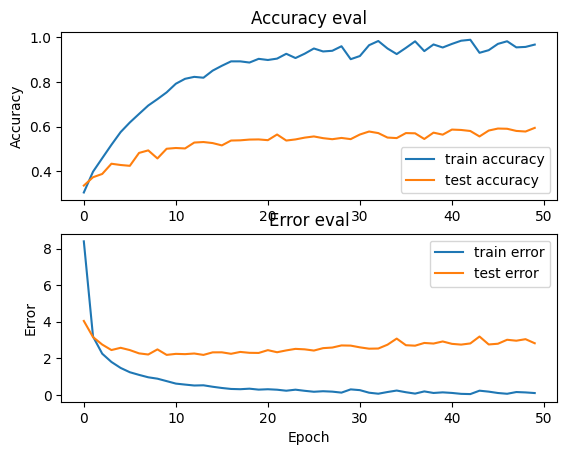

In [18]:
plot_history(history)

The model is clearly overfitting.

Let's resolve it by applying Dropout and Regularization

In [19]:
model_v2 = keras.Sequential([

    # input layer
    keras.layers.Input(shape=(X.shape[1], X.shape[2])),
    keras.layers.Flatten(),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_v2.compile(optimizer=optimiser,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    

In [20]:
model_v2.summary()
history = model_v2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 1690)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       865,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,014,218 (3.87 MB)

 Trainable params: 1,014,218 (3.87 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1511 - loss: 50.8704 - val_accuracy: 0.2350 - val_loss: 3.5513
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1617 - loss: 8.2060 - val_accuracy: 0.1182 - val_loss: 3.4530
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1541 - loss: 5.0510 - val_accuracy: 0.1028 - val_loss: 3.4765
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1494 - loss: 4.1025 - val_accuracy: 0.1035 - val_loss: 3.4787
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1479 - loss: 3.7888 - val_accuracy: 0.1185 - val_loss: 3.4587
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1476 - loss: 3.6266 - val_accuracy: 0.1375 - val_loss: 3.4202
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1618 - loss: 3.5915 - val_accuracy: 0.1419 - val_loss: 3.4070
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1697 - loss: 3.4944 - val_acc

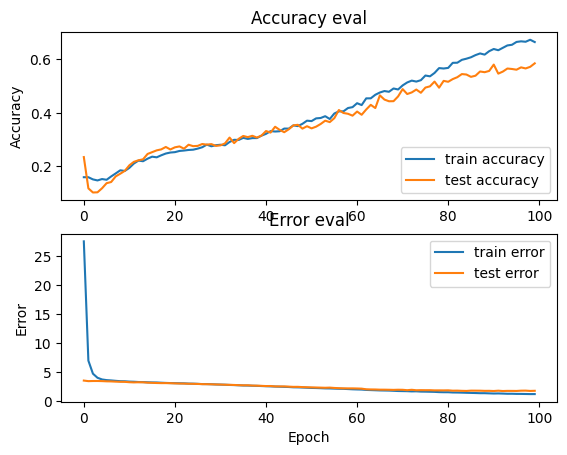

In [21]:
plot_history(history)

Dropout and regularization have resolved overfitting but accuracy must be improved.

I first try to **Normalize the Features**  
Normalize X to have values in a consistent range (e.g., 0 to 1 or mean=0, std=1):

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Flatten X for scaling
num_samples, time_steps, coefficients = X_train.shape
X_train_flat = X_train.reshape(num_samples, -1) # num_samples stays the same because each sample corresponds to one audio file. -1 merges time_steps and coefficients into one dimension, making each sample a 1D vector of features.
X_train_scaled = scaler.fit_transform(X_train_flat).reshape(num_samples, time_steps, coefficients)

# Apply the same scaling to test set
X_test_scaled = scaler.transform(X_test.reshape(X_test.shape[0], -1)).reshape(X_test.shape)

I also update the model by changing these hyperparameters:

1. Increase Regularization: higher L2 regularization factor (l2(0.01) instead of 0.001).

2. Simplify the Model by reducing the number of neurons in the dense layers (256 -> 128 -> 32 instead of 512 -> 256 -> 64).

3. Increase the dropout rates to 0.4 for better regularization.

4. Use Batch Normalization:
Add keras.layers.BatchNormalization() after dense layers to stabilize learning and improve generalization.

In [36]:
model_v3 = keras.Sequential([

    # input layer
    keras.layers.Input(shape=(X.shape[1], X.shape[2])),
    keras.layers.Flatten(),

    # 1st dense layer
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),

    # 2nd dense layer
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),

    # 3rd dense layer
    keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_v3.compile(optimizer=optimiser,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [37]:
model_v3.summary()
history = model_v3.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), batch_size=32, epochs=100)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 1690)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │       432,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 471,914 (1.80 MB)

 Trainable params: 471,082 (1.80 MB)

 Non-trainable params: 832 (3.25 KB)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1705 - loss: 9.4987 - val_accuracy: 0.3635 - val_loss: 8.2865
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2831 - loss: 8.6686 - val_accuracy: 0.4212 - val_loss: 7.8559
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3223 - loss: 8.1809 - val_accuracy: 0.4513 - val_loss: 7.5047
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3556 - loss: 7.8443 - val_accuracy: 0.4783 - val_loss: 7.1622
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3750 - loss: 7.4219 - val_accuracy: 0.5030 - val_loss: 6.8155
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3864 - loss: 7.0961 - val_accuracy: 0.5093 - val_loss: 6.4803
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4009 - loss: 6.7287 - val_accuracy: 0.5160 - val_loss: 6.1569
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4119 - loss: 6.4112 - val_accu

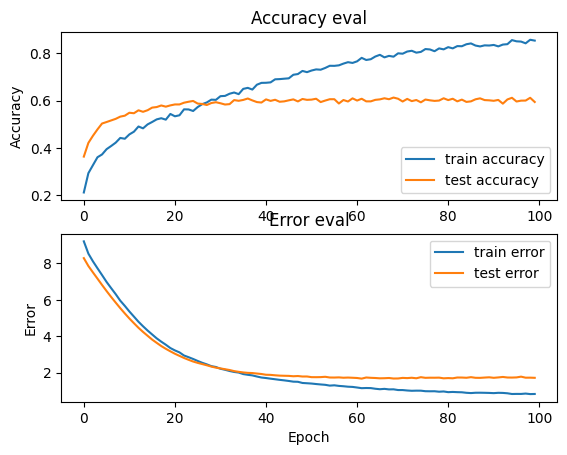

In [38]:
plot_history(history)

In [42]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

In [43]:
# Early Stopping Callback
early_stopping = EarlyStopping(
    monitor='val_loss',    # Monitor validation loss
    patience=10,           # Stop if no improvement after 10 epochs
    restore_best_weights=True  # Restore the weights of the best epoch
)

In [44]:
# Step Decay Function for Learning Rate
def step_decay(epoch):
    initial_lr = 0.001  # Starting learning rate
    drop = 0.5         # Factor to reduce the learning rate
    epochs_drop = 20   # Reduce every 20 epochs
    lr = initial_lr * np.power(drop, np.floor((1 + epoch) / epochs_drop))
    return lr

# Learning Rate Scheduler Callback
lr_scheduler = LearningRateScheduler(step_decay)

In [45]:
model_v4 = keras.Sequential([
    # Input Layer
    keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.Flatten(),

    # Dense Layers with Regularization
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),

    # Output Layer
    keras.layers.Dense(10, activation='softmax')
])

# Compile Model
optimiser = keras.optimizers.Adam(learning_rate=0.001)
model_v4.compile(
    optimizer=optimiser,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [46]:
history = model_v4.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    callbacks=[early_stopping, lr_scheduler],
    batch_size=32,
    verbose=1
)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2632 - loss: 8.3870 - val_accuracy: 0.4766 - val_loss: 5.1465 - learning_rate: 0.0010
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4052 - loss: 4.7936 - val_accuracy: 0.5207 - val_loss: 3.1969 - learning_rate: 0.0010
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4327 - loss: 3.1194 - val_accuracy: 0.5427 - val_loss: 2.4064 - learning_rate: 0.0010
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4539 - loss: 2.4949 - val_accuracy: 0.5387 - val_loss: 2.0947 - learning_rate: 0.0010
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4803 - loss: 2.1820 - val_accuracy: 0.5227 - val_loss: 1.9597 - learning_rate: 0.0010
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4721 - loss: 2.0732 - val_accuracy: 0.5524 - val_loss: 1.8494 - learning_rate: 0.0010
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4931 - loss: 1.

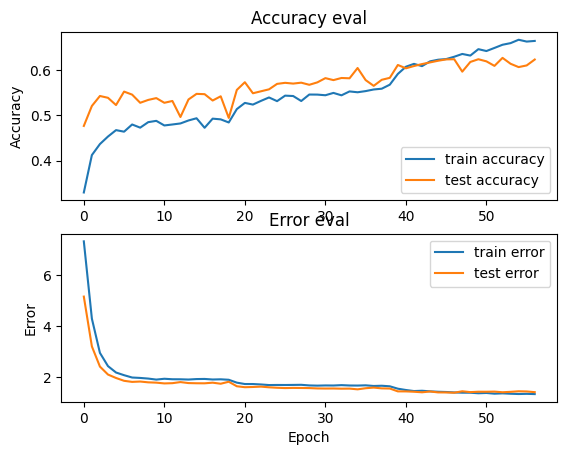

In [47]:
plot_history(history)

Accuracy has slightly improved without overfitting till 50 epochs.

Let's try now with a CNN-architecture:

In [71]:
def prepare_datasets(test_size, validation_size):

    # load data
    X, y = load_data("data_10.npz")

    # create train, validation and test split
    X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_full_train, y_full_train, test_size=validation_size)

    # add an axis to input sets
    X_full_train = X_full_train[..., np.newaxis]
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_full_train, X_train, X_validation, X_test, y_full_train, y_train, y_validation, y_test

In [60]:
def build_cnn_model(input_shape):

    # build network topology
    model = keras.Sequential()

    # Input Layer
    model.add(keras.layers.Input(shape=input_shape)),

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [61]:
def predict(model, X, y):
    """Predict a single sample using the trained model

    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))

In [62]:
# get train, validation, test splits
X_full_train, X_train, X_validation, X_test, y_full_train, y_train, y_validation, y_test = prepare_datasets(0.2, 0.25)

Data succesfully loaded!
Shape of X: (9986, 130, 13)
Shape of y: (9986,)


In [63]:
len(X_train), len(X_validation), len(X_test)

(5991, 1997, 1998)

In [64]:
X_train.shape

(5991, 130, 13, 1)

In [65]:
# create network
input_shape = (X_train.shape[1], X_train.shape[2], 1)
model = build_cnn_model(input_shape)

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 128, 11, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 64, 6, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 64, 6, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 62, 4, 32)      │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 31, 2, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 31, 2, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 1, 32)      │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 15, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 15, 1, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        30,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,514 (177.79 KB)

 Trainable params: 45,322 (177.04 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1870 - loss: 2.6653 - val_accuracy: 0.2984 - val_loss: 1.9531
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3096 - loss: 2.0027 - val_accuracy: 0.4041 - val_loss: 1.6527
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3956 - loss: 1.7278 - val_accuracy: 0.4537 - val_loss: 1.5385
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4437 - loss: 1.5761 - val_accuracy: 0.4842 - val_loss: 1.4572
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4594 - loss: 1.5116 - val_accuracy: 0.5103 - val_loss: 1.3894
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4913 - loss: 1.4281 - val_accuracy: 0.5288 - val_loss: 1.3329
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5084 - loss: 1.3520 - val_accuracy: 0.5508 - val_loss: 1.2886
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5376 - loss: 1.2960 - val_accu

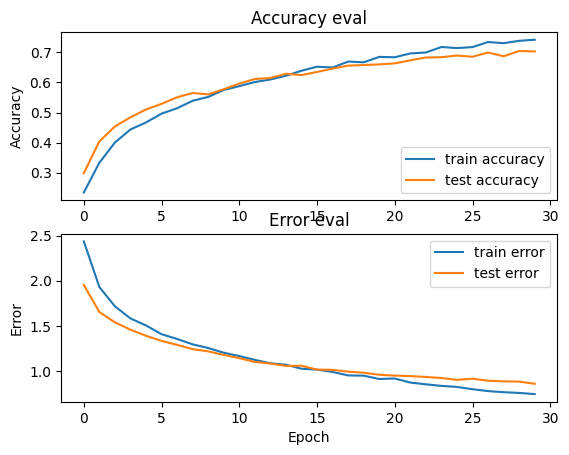

In [66]:
# train model
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

# plot accuracy/error for training and validation
plot_history(history)

In [67]:
# evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

63/63 - 0s - 4ms/step - accuracy: 0.7037 - loss: 0.8387

Test accuracy: 0.7037037014961243


In [70]:
# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]

# predict sample
predict(model, X_to_predict, y_to_predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Target: 2, Predicted label: [2]


The CNN model is performing reasonably better than a standard NN architecture:

**Accuracy Trend:**  
Training and test accuracies are increasing steadily and converge, which is a good sign that the model isn't overfitting.
The final test accuracy (~70%) suggests room for improvement, but this may depend on the dataset's difficulty.

**Error Trend:**  
Both training and test errors decrease smoothly over epochs, indicating good convergence.

Here's an updated build_cnn_model function applying some hyperparameters improvement:

1. Increased the number of filters in the later Conv2D layers to capture more complex patterns.
2. Increased Dropout rate to 0.4 for better regularization.
3. Added L2 regularization to both Conv2D and Dense layers.

In [72]:
def build_cnn_model2(input_shape):
    # L2 Regularization parameter
    l2_reg = 0.01

    # Build network topology
    model = keras.Sequential()

    # Input Layer
    model.add(keras.layers.Input(shape=input_shape))

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', 
                                  kernel_regularizer=keras.regularizers.l2(l2_reg)))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', 
                                  kernel_regularizer=keras.regularizers.l2(l2_reg)))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(128, (2, 2), activation='relu', 
                                  kernel_regularizer=keras.regularizers.l2(l2_reg)))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # Flatten output and feed into dense layers
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu', 
                                 kernel_regularizer=keras.regularizers.l2(l2_reg)))
    model.add(keras.layers.Dropout(0.4))  # Increased dropout rate

    # Output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model


In [73]:
X_full_train, X_train, X_validation, X_test, y_full_train, y_train, y_validation, y_test = prepare_datasets(0.2, 0.25)

Data succesfully loaded!
Shape of X: (9986, 130, 13)
Shape of y: (9986,)


In [74]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)
model = build_cnn_model(input_shape)

optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.1739 - loss: 2.7281 - val_accuracy: 0.3470 - val_loss: 1.8325
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3682 - loss: 1.8664 - val_accuracy: 0.4577 - val_loss: 1.5419
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4073 - loss: 1.6707 - val_accuracy: 0.4872 - val_loss: 1.4221
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4528 - loss: 1.5515 - val_accuracy: 0.5093 - val_loss: 1.3441
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4849 - loss: 1.4154 - val_accuracy: 0.5368 - val_loss: 1.2696
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4907 - loss: 1.3965 - val_accuracy: 0.5438 - val_loss: 1.2480
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5139 - loss: 1.3270 - val_accuracy: 0.5553 - val_loss: 1.2055
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5575 - loss: 1.2703 - val_accu

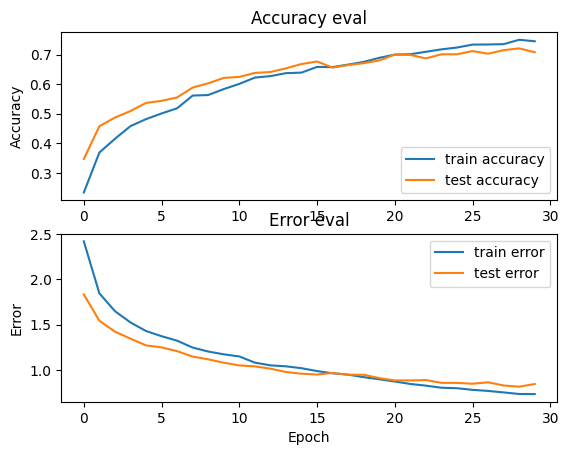

In [75]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

plot_history(history)

In [76]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

63/63 - 0s - 5ms/step - accuracy: 0.7217 - loss: 0.8210

Test accuracy: 0.7217217087745667


In [77]:
from sklearn.metrics import classification_report

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Define target class names
class_names = ["blues", "classical", "country", "disco", "hiphop", 
               "jazz", "metal", "pop", "reggae", "rock"]

# Print classification report
report = classification_report(y_test, y_pred_classes, target_names=class_names)
print(report)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
              precision    recall  f1-score   support

       blues       0.78      0.74      0.76       202
   classical       0.87      0.95      0.90       210
     country       0.61      0.69      0.65       200
       disco       0.71      0.61      0.66       196
      hiphop       0.73      0.65      0.68       189
        jazz       0.72      0.81      0.76       221
       metal       0.83      0.87      0.85       190
         pop       0.70      0.80      0.75       184
      reggae       0.67      0.60      0.63       193
        rock       0.58      0.50      0.54       213

    accuracy                           0.72      1998
   macro avg       0.72      0.72      0.72      1998
weighted avg       0.72      0.72      0.72      1998

